# PP2 - Parte 1

## Notebook do exercício prático 2, Parte 1

* **UEA - Universidade do Estado do Amazonas**
* **EST - Escola Superior de Tecnologia**
* **Matéria de Redes Neurais**
* **Professora Elloá Guedes**
* **Repositório:** https://github.com/levidasilvalima/RNA-PP2

### Autores
* Ian Gustavo Alves Pessoa Silva - 1715080288  
* William Azevedo da Silva - 1615080226  
* Daniel Akio Chen - 1715080253  
* Levi da Silva Lima - 1615080131  


## Import das bibliotecas
Aqui há apenas um simples import das bibliotecas a serem usadas

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from google.colab import drive

In [20]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Import do arquivo a ser usado
Como o próprio nome diz, é import dos dados brutos a serem usados.


In [117]:
# dados_brutos = np.fromfile('./dataAll.txt')
dados_brutos = np.fromfile('/content/drive/My Drive/Colab Notebooks/dataAll.txt')
print(dados_brutos)

[-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ]


## Organização dos dados
Como os dados estão em um vetor único gigante, devemos remoldá-lo para podermos manipulá-lo.  
Usando o *reshape* e o *transpose*, os dados foram reconstruídos para que o x, y e resultado caibam em vetores diferentes.  
  
Aqui, temos:
* Vetor1: Contém elementos X da tupla
* Vetor2: Contém elementos Y da tupla
* Vetor_resposta: Contém elementos *Resposta* da tupla
* x0: É um termo único adicionado, descrito no modelo de neurônio perceptron de Rosenblatt

In [118]:
dados_consertados = dados_brutos.reshape((1000,3))
dados = dados_consertados.transpose()

vetor1 = np.array(dados[0])
vetor2 = np.array(dados[1])
vetor_resposta = np.array(dados[2])
x0 = -1


## Inicialização dos pesos aleatórios
Aqui, para fazer uma simulação boa e demonstrar que podemos chegar ao resultado final de qualquer forma, geramos 3 pesos aleatórios.  
Os pesos foram gerados no intervalo **{-0.5, 0.5}**

In [119]:
pesos = np.random.uniform(-0.5, 0.5, 3)

for i in range (len(pesos)):
  pesos[i] = round(pesos[i], 4)

print("Pesos iniciais: ", pesos)

Pesos iniciais:  [ 0.0265 -0.341  -0.4816]


## Função de ativação
Aqui temos a função de ativação que será usada para validar as respostas do aprendizado.  
A função usada foi a função de ativação degrau, com v = 0.  
Ou seja, quando a entrada é 0 ou maior, é 1, caso contrário é 0.

In [120]:
#Função de ativação tipo degrau, com v = 0
def funcao_ativacao(saida):
  if saida >= 0:
    return 1
  else:
    return 0
        

## Principal - Aprendizado
Aqui temos a parte principal desta parte 1, o código de aprendizagem dos pesos.  
O código irá ser executado e verificará a função de ativação e a resposta final, ajustando os pesos quando necessário.  
Além disso, o código irá contar quantas vezes os pesos foram ajustados e o número total de épocas.  
No final, ele irá *imprimir* os **ajustes feitos**, o **número de épocas** e o **número de ajustes feitos**.
  
Nós temos:  
* n: A taxa de Aprendizado.  
* epoca: Um ciclo de aprendizagem, um ciclo acaba quando todos os pesos visitados 1 vez(modificado ou não).  
* mudanca_peso: Quantas vezes o peso foi ajustado em uma época.  
* mudanca_total: Quantas vezes, ao total, o peso foi ajustado.  

Para parar, o código verificará todo final de época se houve convergência.  
Para convergir, o vetor das funções de ativação deve ser igual ao vetor resultado

In [121]:
#Temporários
res_temp = 0                    # Int temporário que vai guardar o res para funcao de ativacao
vetor_final = np.empty(1000)    # Vetor que será comparado com o resultado
fa = 0                          # Funcao de ativacao

#Pontos de Interesse
n = 0.1             # Taxa de aprendizado
mudanca_peso = 0    # N de ajustes de peso
mudanca_total = 0   # N total de ajustes de peso
epoca = 0           # Epocas de ajuste

#Ele só para quando o vetor de respostas for igual ao vetor final
while(True):
  flag = False
  epoca += 1
  print("Época {}:".format(epoca))
  for i in range(len(dados[0])):
    vetor_res_temp = round((x0*pesos[0]) + (vetor1[i]*pesos[1]) + (vetor2[i]*pesos[2]), 4)
    fa = funcao_ativacao(vetor_res_temp)
    vetor_final[i] = fa

    if (fa != vetor_resposta[i]): #Se estiver errado
      #Erro é (esperado - funcao ativacao)
      erro = vetor_resposta[i] - fa

      valor_anterior = np.array([x0, vetor1[i], vetor2[i]])
      #Ajuste de peso
      pesos = pesos + (n*erro*valor_anterior)
      mudanca_peso += 1

      for elem in range (len(pesos)):
        pesos[elem] = round(pesos[elem], 4)

      #Print vetor de pesos, exerc 5
      print(" Novo vetor de pesos da epoca {}: {}".format(epoca, pesos))

  #Print dos pesos da época
  print(" Na época {} houve {} pesos mudados".format(epoca, mudanca_peso))
  mudanca_total += mudanca_peso
  mudanca_peso = 0

  if((vetor_resposta == vetor_final).all()):
      break

print("\nCONVERGIU!")

Época 1:
 Novo vetor de pesos da epoca 1: [  0.1265  36.0378 -24.8958]
 Novo vetor de pesos da epoca 1: [   0.2265  -17.6213 -101.3916]
 Novo vetor de pesos da epoca 1: [  0.1265  55.1747 -65.562 ]
 Novo vetor de pesos da epoca 1: [2.650000e-02 1.377734e+02 1.429380e+01]
 Novo vetor de pesos da epoca 1: [ 1.265000e-01  1.436192e+02 -6.400080e+01]
 Novo vetor de pesos da epoca 1: [   0.2265  103.6103 -141.8935]
 Novo vetor de pesos da epoca 1: [  0.3265 157.2801 -92.8012]
 Novo vetor de pesos da epoca 1: [   0.2265  104.32   -149.6707]
 Novo vetor de pesos da epoca 1: [  0.3265 163.8795 -99.5484]
 Novo vetor de pesos da epoca 1: [   0.2265  118.3549 -165.1843]
 Novo vetor de pesos da epoca 1: [  0.3265 209.0708 -90.471 ]
 Novo vetor de pesos da epoca 1: [   0.2265  151.2898 -150.7792]
 Na época 1 houve 12 pesos mudados
Época 2:
 Na época 2 houve 0 pesos mudados

CONVERGIU!


## Cálculo da função da reta
Depois de se ter calculado os pesos e havido a convergência, nós podemos encontrar a curva que descreve a divisão dos pontos.  
  
A curva pode ser descrita como:  
  
$$y = \frac{w0}{w2} - \frac{w1}{w2}*x$$  
  
Onde:
* w0 é o peso de x0
* w1 é o peso de x
* w2 é o peso de y




In [14]:
funcao_a = pesos[0]/pesos[2]
funcao_b = pesos[1]/pesos[2]

x = np.arange(-1000,1000)

y = funcao_a - funcao_b * x

print("Função: y = ( {} ) - ( {} )*x".format(funcao_a, funcao_b))


Função: y = ( 0.0035112707749235315 ) - ( -1.0021522802926845 )*x


## Plot do gráfico e print dos ajustes e épocas totais
Finalmente, conseguido a função da reta, nós podemos plotar a reta junto com pontos descritos pelos dados.  
Assim, podemos visualizar se a reta corretamente dividiu os dados.  

Total de ajustes de peso:  24
Total de épocas:  2


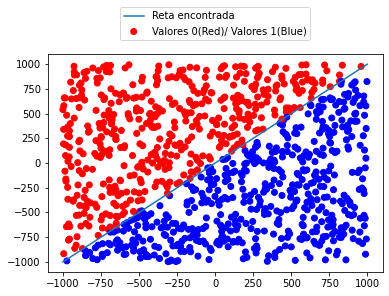

In [15]:
cor = np.where(vetor_resposta == 0, "red", "blue")

print("Total de ajustes de peso: ", mudanca_total)
print("Total de épocas: ", epoca)

plt.scatter(vetor1, vetor2, c=cor, label = "Valores 0(Red)/ Valores 1(Blue)")
plt.plot(x, y, label = "Reta encontrada")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.24))

## Resultados  
Os ajustes acima resultaram em: **24**.  
Além disso, o número de épocas resultou em: **2**.  

## Considerações finais
Pode se ver pelo gráfico acima, que a reta dividiu satisfatoriamente os pontos de valores 0 e 1.  
Além disso, por causa do intervalo possível de pesos iniciais, o número de ajustes e épocas podem variar bastante.
No caso acima, os ajustes e épocas resultaram em 24 e 2 respectivamente, porém, nos testes feitos, houveram casos que o número de épocas chegou a 8 e até mesmo 13. Enquanto isso,
o número de ajustes chegou a 80 em alguns testes.  
Portanto, pode-se ver que, apesar dos pesos iniciais, o modelo perceptron de Rosenblatt eventualmente converge em uma reta que divide os dois conjuntos.  
Claro, isso tudo graças ao fato que o conjunto é linearmente separável.